# The function for this notebook is cleaning the City of Toronto Daily Weather Data.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
sns.set_context("notebook")
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the CSV into a DataFrame
weather_data_raw = pd.read_csv('Daily Weather Data\City of Toronto Weather data.csv')

In [3]:
weather_data_raw.head()

,x,y,MEAN_TEMPERATURE_FLAG,TOTAL_PRECIPITATION,CLIMATE_IDENTIFIER,SNOW_ON_GROUND,HEATING_DEGREE_DAYS,SNOW_ON_GROUND_FLAG,MIN_REL_HUMIDITY,TOTAL_RAIN,...,LOCAL_DAY,DIRECTION_MAX_GUST_FLAG,TOTAL_RAIN_FLAG,SPEED_MAX_GUST,LOCAL_DATE,MAX_REL_HUMIDITY_FLAG,HEATING_DEGREE_DAYS_FLAG,MIN_TEMPERATURE_FLAG,DIRECTION_MAX_GUST,TOTAL_SNOW_FLAG
0,-79.4,43.666667,NaN,0.0,6158355,8.0,29.5,NaN,NaN,NaN,...,1,M,M,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,M
1,-79.4,43.666667,NaN,2.0,6158355,8.0,34.8,NaN,NaN,NaN,...,2,M,M,NaN,2014-01-02 00:00:00,NaN,NaN,NaN,NaN,M
2,-79.4,43.666667,NaN,0.2,6158355,9.0,32.7,NaN,NaN,NaN,...,3,M,M,NaN,2014-01-03 00:00:00,NaN,NaN,NaN,NaN,M
3,-79.4,43.666667,NaN,0.0,6158355,9.0,21.5,NaN,NaN,NaN,...,4,M,M,NaN,2014-01-04 00:00:00,NaN,NaN,NaN,NaN,M
4,-79.4,43.666667,NaN,11.8,6158355,11.0,18.2,NaN,NaN,NaN,...,5,M,M,NaN,2014-01-05 00:00:00,NaN,NaN,NaN,NaN,M


In [4]:
#create a new data frame contains the useful columns below
#location: x
#location: y
#TOTAL_PRECIPITATION
#SNOW_ON_GROUND
#MIN_TEMPERATURE
#MAX_TEMPERATURE
#MEAN_TEMPERATURE
#LOCAL_DATE

weather_data_sorted = weather_data_raw[['LOCAL_DATE','x', 'y', 'TOTAL_PRECIPITATION', 
                                        'SNOW_ON_GROUND','MIN_TEMPERATURE','MAX_TEMPERATURE',
                                        'MEAN_TEMPERATURE',]]
weather_data_sorted = weather_data_sorted.set_index('LOCAL_DATE')

weather_data_sorted.head()

,x,y,TOTAL_PRECIPITATION,SNOW_ON_GROUND,MIN_TEMPERATURE,MAX_TEMPERATURE,MEAN_TEMPERATURE
LOCAL_DATE,,,,,,,
2014-01-01 00:00:00,-79.4,43.666667,0.0,8.0,-14.5,-8.4,-11.5
2014-01-02 00:00:00,-79.4,43.666667,2.0,8.0,-19.2,-14.3,-16.8
2014-01-03 00:00:00,-79.4,43.666667,0.2,9.0,-22.3,-7.1,-14.7
2014-01-04 00:00:00,-79.4,43.666667,0.0,9.0,-7.2,0.3,-3.5
2014-01-05 00:00:00,-79.4,43.666667,11.8,11.0,-1.7,1.4,-0.2


In [5]:
#sort the data for snow precipitatin 
#drop rows contain 0 value for TOTAL_PRECIPITATION and drop the Nan value for SNOW_ON_GROUND
weather_data_snow = weather_data_sorted[weather_data_sorted['TOTAL_PRECIPITATION'] != 0]
weather_data_snow = weather_data_snow.dropna(subset=['SNOW_ON_GROUND'])

weather_data_snow.head()

,x,y,TOTAL_PRECIPITATION,SNOW_ON_GROUND,MIN_TEMPERATURE,MAX_TEMPERATURE,MEAN_TEMPERATURE
LOCAL_DATE,,,,,,,
2014-01-02 00:00:00,-79.4,43.666667,2.0,8.0,-19.2,-14.3,-16.8
2014-01-03 00:00:00,-79.4,43.666667,0.2,9.0,-22.3,-7.1,-14.7
2014-01-05 00:00:00,-79.4,43.666667,11.8,11.0,-1.7,1.4,-0.2
2014-01-06 00:00:00,-79.4,43.666667,6.4,12.0,-15.8,2.4,-6.7
2014-01-07 00:00:00,-79.4,43.666667,0.4,12.0,-22.2,-15.8,-19.0


### Ranking the precipitation day and snow on ground day in Toronto can help us to find out the correlation between how big snows effect on the delay

In [6]:
#rank the top precipitation day in Toronoto
weather_data_precipitation_rank = weather_data_snow.sort_values(by='TOTAL_PRECIPITATION', ascending=False)
weather_data_precipitation_rank.head()

,x,y,TOTAL_PRECIPITATION,SNOW_ON_GROUND,MIN_TEMPERATURE,MAX_TEMPERATURE,MEAN_TEMPERATURE
LOCAL_DATE,,,,,,,
2020-01-11 00:00:00,-79.4,43.666667,55.3,1.0,2.2,11.8,7.0
2022-12-15 00:00:00,-79.4,43.666667,39.8,3.0,-0.6,2.5,1.0
2022-01-17 00:00:00,-79.4,43.666667,36.2,25.0,-5.0,-2.3,-3.6
2018-04-15 00:00:00,-79.4,43.666667,36.1,4.0,-2.9,1.4,-0.8
2022-02-17 00:00:00,-79.4,43.666667,35.8,4.0,-4.3,8.0,1.9


In [7]:
# Create the column of date that contains the orginal index information
weather_data_precipitation_rank['Date'] = weather_data_precipitation_rank.index
weather_data_precipitation_rank['Date'] = pd.to_datetime(weather_data_precipitation_rank['Date']).astype(str)


weather_data_precipitation_rank.head()

,x,y,TOTAL_PRECIPITATION,SNOW_ON_GROUND,MIN_TEMPERATURE,MAX_TEMPERATURE,MEAN_TEMPERATURE,Date
LOCAL_DATE,,,,,,,,
2020-01-11 00:00:00,-79.4,43.666667,55.3,1.0,2.2,11.8,7.0,2020-01-11
2022-12-15 00:00:00,-79.4,43.666667,39.8,3.0,-0.6,2.5,1.0,2022-12-15
2022-01-17 00:00:00,-79.4,43.666667,36.2,25.0,-5.0,-2.3,-3.6,2022-01-17
2018-04-15 00:00:00,-79.4,43.666667,36.1,4.0,-2.9,1.4,-0.8,2018-04-15
2022-02-17 00:00:00,-79.4,43.666667,35.8,4.0,-4.3,8.0,1.9,2022-02-17


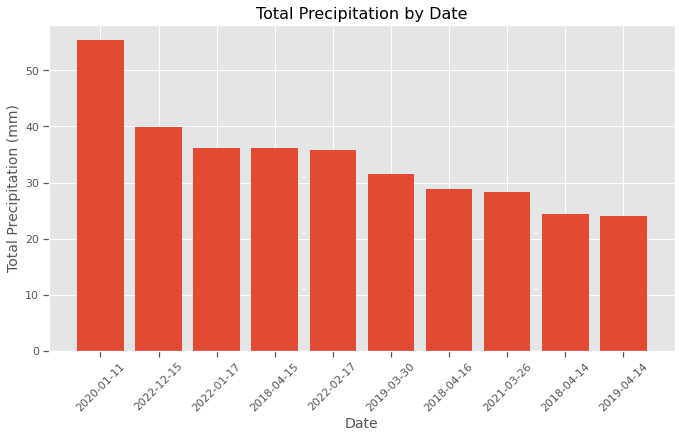

In [17]:
weather_data_precipitation_rank = weather_data_precipitation_rank.head(10)

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(weather_data_precipitation_rank['Date'], weather_data_precipitation_rank['TOTAL_PRECIPITATION'])
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total Precipitation (mm)', fontsize = 14)
plt.title('Total Precipitation by Date', fontsize = 16)
plt.xticks(rotation=45)
plt.show()

In [9]:
#rank the top SNOW_ON_GROUND day in Toronoto
weather_data_snow_on_ground_rank = weather_data_snow.sort_values(by='SNOW_ON_GROUND', ascending=False)
weather_data_snow_on_ground_rank.head()

,x,y,TOTAL_PRECIPITATION,SNOW_ON_GROUND,MIN_TEMPERATURE,MAX_TEMPERATURE,MEAN_TEMPERATURE
LOCAL_DATE,,,,,,,
2022-01-18 00:00:00,-79.4,43.666667,0.8,32.0,-10.1,0.2,-5.0
2014-02-06 00:00:00,-79.4,43.666667,0.5,30.0,-13.2,-6.5,-9.9
2019-01-29 00:00:00,-79.4,43.666667,3.1,29.0,-14.1,0.9,-6.6
2014-02-19 00:00:00,-79.4,43.666667,0.2,28.0,-1.4,7.8,3.2
2014-02-18 00:00:00,-79.4,43.666667,5.7,28.0,-4.2,0.7,-1.8


In [10]:
# Create the column of date that contains the orginal index information
weather_data_snow_on_ground_rank['Date'] = weather_data_snow_on_ground_rank.index
weather_data_snow_on_ground_rank['Date'] = pd.to_datetime(weather_data_snow_on_ground_rank['Date']).astype(str)


weather_data_snow_on_ground_rank.head()

,x,y,TOTAL_PRECIPITATION,SNOW_ON_GROUND,MIN_TEMPERATURE,MAX_TEMPERATURE,MEAN_TEMPERATURE,Date
LOCAL_DATE,,,,,,,,
2022-01-18 00:00:00,-79.4,43.666667,0.8,32.0,-10.1,0.2,-5.0,2022-01-18
2014-02-06 00:00:00,-79.4,43.666667,0.5,30.0,-13.2,-6.5,-9.9,2014-02-06
2019-01-29 00:00:00,-79.4,43.666667,3.1,29.0,-14.1,0.9,-6.6,2019-01-29
2014-02-19 00:00:00,-79.4,43.666667,0.2,28.0,-1.4,7.8,3.2,2014-02-19
2014-02-18 00:00:00,-79.4,43.666667,5.7,28.0,-4.2,0.7,-1.8,2014-02-18


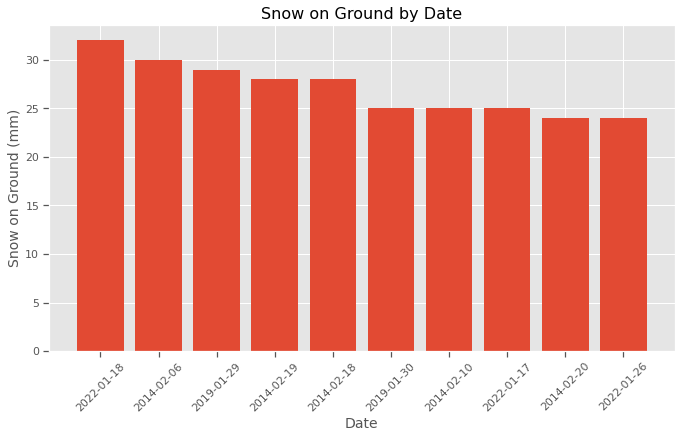

In [18]:
weather_data_snow_on_ground_rank = weather_data_snow_on_ground_rank.head(10)

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(weather_data_snow_on_ground_rank['Date'], weather_data_snow_on_ground_rank['SNOW_ON_GROUND'])
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Snow on Ground (mm)', fontsize = 14)
plt.title('Snow on Ground by Date', fontsize = 16)
plt.xticks(rotation=45)
plt.show()